## Описание проекта
## Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

<a id = 'title'></a>
# [Часть 1. Приоритезация гипотез](#stage_1)
В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

## Задача
- [Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета](#ice)

---

- [Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета](#rice)

---

- [Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло](#ice_rice_itog)





# [Часть 2. Анализ A/B-теста](#stage_2)
Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.

## Проанализируйте A/B-тест:

1. [Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения](#stage_2_1)

---

2. [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения](#stage_2_2)

---

3. [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения](#stage_2_3)

---

4. [Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения](#stage_2_4)

---

5. [Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения](#stage_2_5)

---

6. [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения](#stage_2_6)

---

7. [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей](#stage_2_7)

--- 

8. [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения](#stage_2_8)

---

9. [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов](#stage_2_9)

---

10. [Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения](#stage_2_10)

---

11. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения](#stage_2_11)

---

12. [Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения](#stage_2_12)

---

13. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения](#stage_2_13)

---

14. [Примите решение по результатам теста и объясните его](#stage_2_14)

>Варианты решений:
- Остановить тест, зафиксировать победу одной из групп
- Остановить тест, зафиксировать отсутствие различий между группами
- Продолжить тест


# Описание данных

## Данные для первой части
Файл `hypothesis.csv`
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

## Данные для второй части
Файл `orders.csv`
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Файл `visitors.csv`
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста



In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [73]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [74]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [75]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [76]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [77]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [78]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


---

<a id="stage_1"></a>

# Часть 1. Приоритезация гипотез

---

<a id="ice"></a>

##### 1) Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

[к оглавлению](#title)

Text(0.5, 1.0, 'Гистограмма приоритета гипотез (критерием ICE)')

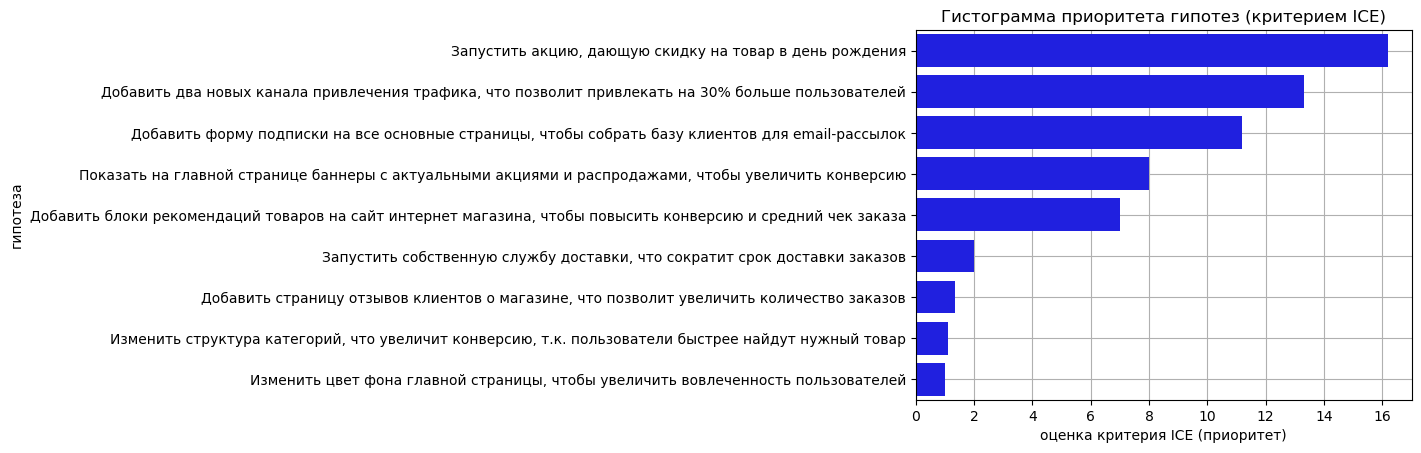

In [79]:
hypothesis = hypothesis.eval('ICE = Impact*Confidence/Efforts').round(2)
hypothesis =\
hypothesis.sort_values(by = 'ICE',
                       ascending = False)
# построение
ax =\
sns.barplot(data=hypothesis,
            x = 'ICE',
            y = 'Hypothesis',
            color='blue')
plt.grid()
ax.set_axisbelow(True)
plt.xlabel('оценка критерия ICE (приоритет)')
plt.ylabel('гипотеза')
plt.title('Гистограмма приоритета гипотез (критерием ICE)')

---

<a id="rice"></a>

##### 2) Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

[к оглавлению](#title)

Text(0.5, 1.0, 'Гистограмма приоритета гипотез (критерием RICE)')

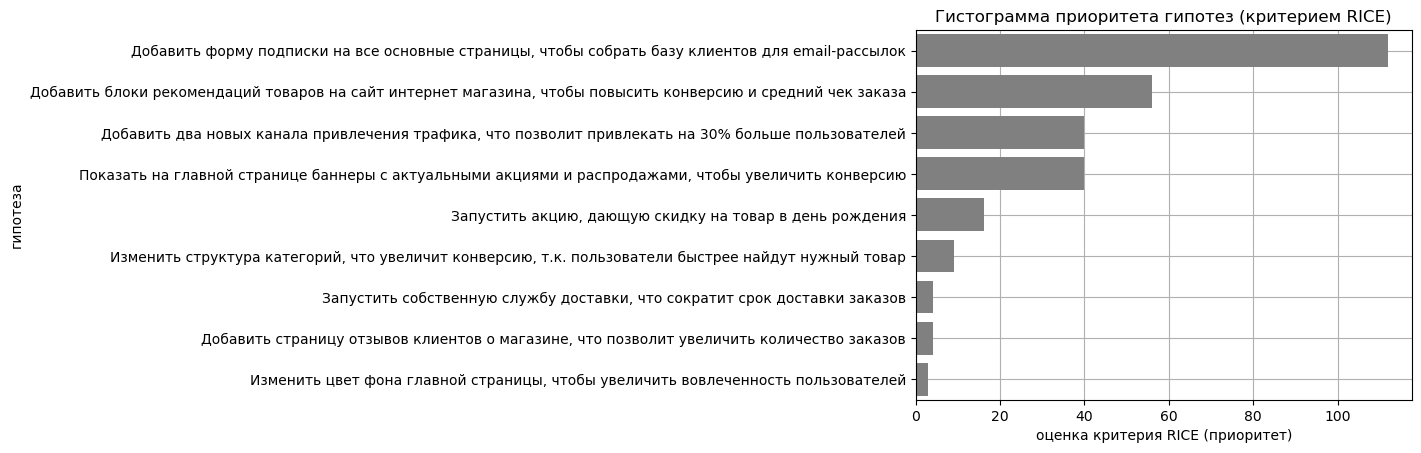

In [80]:
hypothesis = hypothesis.eval('RICE = Reach*Impact*Confidence / Efforts')
hypothesis =\
hypothesis.sort_values(by = 'RICE',
                       ascending = False)

# построение
ax =\
sns.barplot(data=hypothesis,
            x = 'RICE',
            y = 'Hypothesis',
            color='grey')
plt.grid()
ax.set_axisbelow(True)
plt.xlabel('оценка критерия RICE (приоритет)')
plt.ylabel('гипотеза')
plt.title('Гистограмма приоритета гипотез (критерием RICE)')

---

<a id="ice_rice_itog"></a>

##### 3) Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло

[к оглавлению](#title)

In [81]:
hypothesis[['ICE', 'RICE']]

,ICE,RICE
7,11.20,112.0
2,7.00,56.0
0,13.33,40.0
6,8.00,40.0
8,16.20,16.2
3,1.12,9.0
1,2.00,4.0
5,1.33,4.0
4,1.00,3.0


Разные формулы - разные итоги (RICE - учитывает в формуле Reach (охват) , ICE - нет)

---

<a id = 'stage_2'></a>

# Часть 2. Анализ A/B-теста (Проанализируйте A/B-тест)

[к оглавлению](#title)

---

<a id = 'stage_2_1'></a>

##### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения

[к оглавлению](#title)

In [82]:
orders_group =\
orders.groupby(['date', 'group']).agg({'transactionId':'nunique', 'visitorId': 'nunique', 'revenue':'sum'}) \
                                 .reset_index() \
                                 .rename({'transactionId': 'orders', 'visitorId': 'buyers'}, axis=1)


orders_group['group_to_cumsum'] = orders_group['group']
orders_group = orders_group.set_index(['date', 'group'])
orders_cumsum = orders_group.groupby('group_to_cumsum').cumsum().reset_index()
orders_cumsum.head()

,date,group,orders,buyers,revenue
0,2019-08-01,A,24,20,148579
1,2019-08-01,B,21,20,101217
2,2019-08-02,A,44,39,242401
3,2019-08-02,B,45,43,266748
4,2019-08-03,A,68,63,354874


Text(0.5, 1.0, 'Кумулятивная выручка по группам')

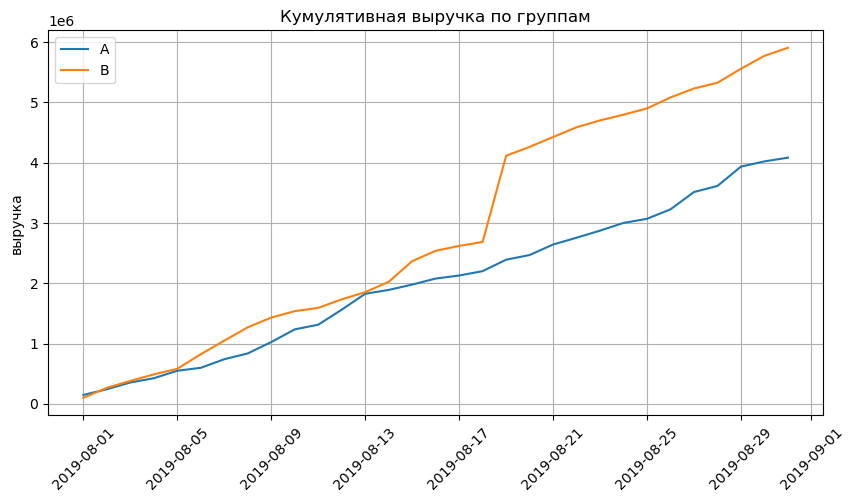

In [83]:
cummulative_revenue = orders_cumsum[['date', 'revenue', 'group']]
cummulative_revenue =\
cummulative_revenue.groupby(['group', 'date'])['revenue'].sum().reset_index()

plt.figure(figsize = (10,5))

sns.lineplot(data = cummulative_revenue[cummulative_revenue['group'] == 'A'],
             x = 'date',
             y = 'revenue',
             label = 'A')
sns.lineplot(data = cummulative_revenue[cummulative_revenue['group'] == 'B'],
             x = 'date',
             y = 'revenue',
             label = 'B')
plt.legend()
plt.grid()
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('выручка')
plt.title('Кумулятивная выручка по группам')

Видим резкий скачек в группе B - выброс, группа A в норме

---

<a id = 'stage_2_2'></a>

##### 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

[к оглавлению](#title)

Text(0.5, 1.0, 'Кумулятивный средний чек по группам')

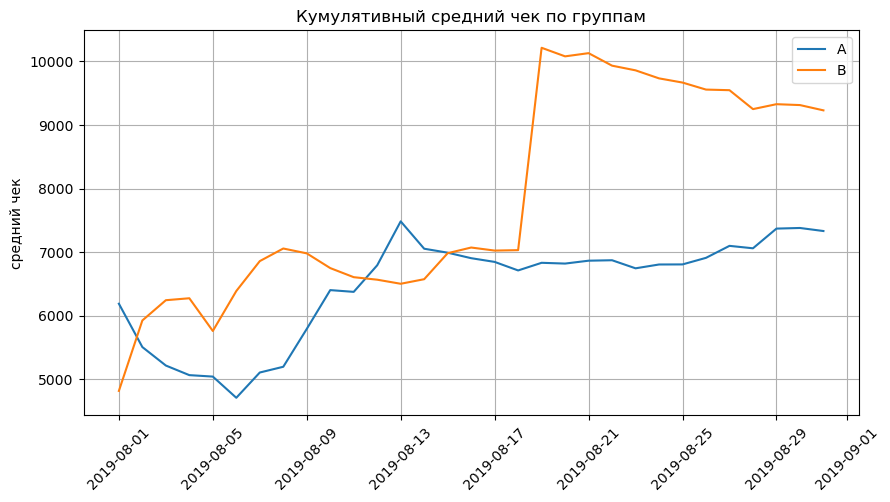

In [84]:
orders_cumsum = orders_cumsum.eval('mean_check = revenue / orders').round(2)
cummulative_mean_check = orders_cumsum[['date', 'group', 'mean_check']]

plt.figure(figsize = (10,5))

plt.plot(cummulative_mean_check[cummulative_mean_check['group'] == 'A']['date'],
         cummulative_mean_check[cummulative_mean_check['group'] == 'A']['mean_check'],
         label = 'A')

plt.plot(cummulative_mean_check[cummulative_mean_check['group'] == 'B']['date'],
         cummulative_mean_check[cummulative_mean_check['group'] == 'B']['mean_check'],
         label = 'B')

plt.legend()
plt.grid()
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('средний чек')
plt.title('Кумулятивный средний чек по группам')

Выброс на графике B (подтверждение предыдущего пункта)

---

<a id = 'stage_2_3'></a>

##### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения

[к оглавлению](#title)

Text(0.5, 1.0, 'Относительное изменение кумулятивного среднего чека группы B к группе A')

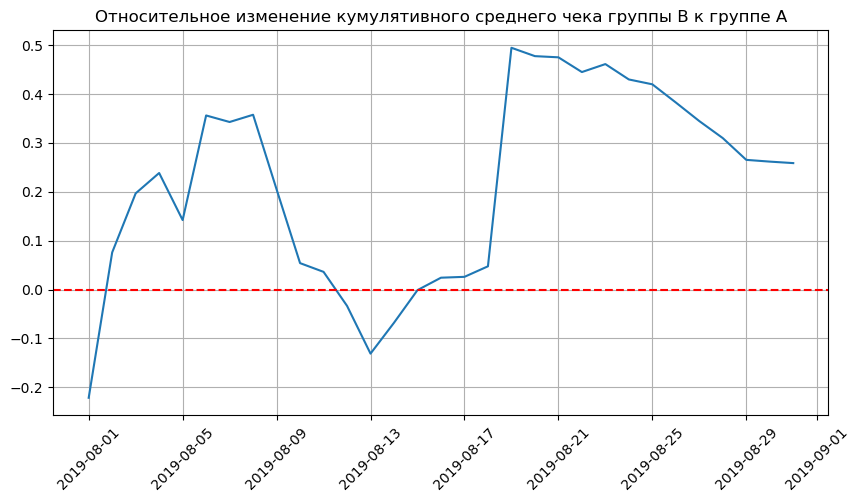

In [85]:
orders_cumsum_B = orders_cumsum[orders_cumsum['group'] == 'B'][['date', 'mean_check']].rename({'mean_check': 'mean_check_B'}, axis = 1)
orders_cumsum_A = orders_cumsum[orders_cumsum['group'] == 'A'][['date', 'mean_check']].rename({'mean_check': 'mean_check_A'}, axis = 1)

cummulative_mean_check_B_to_A = orders_cumsum_A.merge(orders_cumsum_B,
                                                      on = 'date') \
                                               .eval('B_to_A_mean_check = (mean_check_B / mean_check_A) - 1')

plt.figure(figsize = (10,5))

plt.plot(cummulative_mean_check_B_to_A['date'],
         cummulative_mean_check_B_to_A['B_to_A_mean_check'])
plt.axhline(y = 0,
            color = 'red',
            linestyle = '--')

plt.grid()
plt.xticks(rotation = 45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')

Резкие изменения величины - очередное подтверждение выбросов

---

<a id = 'stage_2_4'></a>

##### 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения

[к оглавлению](#title)

Text(0.5, 1.0, 'Кумулятивная конверсия по группам')

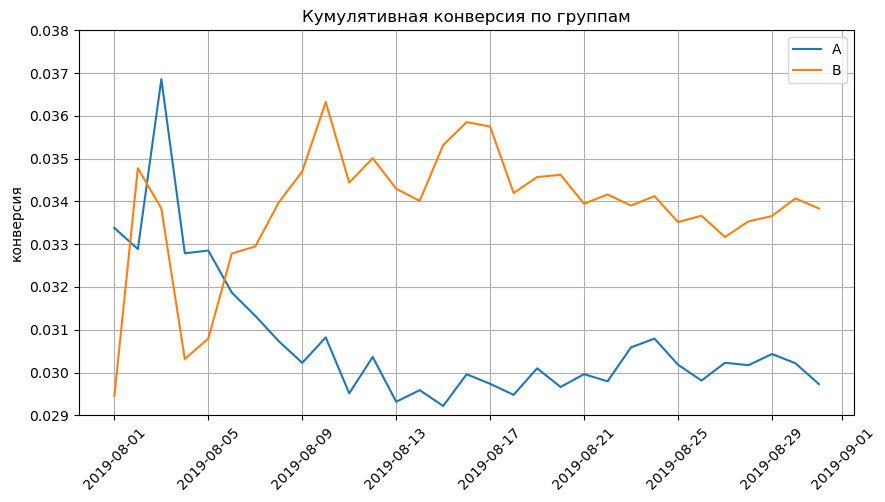

In [86]:
# кумулятивные посетители
visitors['group_for_cumsum'] = visitors['group']
visitors_cumsum =\
visitors.set_index(['date', 'group']).groupby('group_for_cumsum').cumsum().reset_index()

data_cumsum = \
orders_cumsum.merge(visitors_cumsum,
                    on = ['date', 'group'])


data_cumsum = data_cumsum.eval('conversion = orders / visitors')
cummulative_conversion = data_cumsum[['date', 'group', 'conversion']]

plt.figure(figsize = (10,5))

plt.plot(cummulative_conversion[cummulative_conversion['group'] == 'A']['date'],
         cummulative_conversion[cummulative_conversion['group'] == 'A']['conversion'],
         label = 'A')

plt.plot(cummulative_conversion[cummulative_conversion['group'] == 'B']['date'],
         cummulative_conversion[cummulative_conversion['group'] == 'B']['conversion'],
         label = 'B')

plt.ylim((0.029,0.038))
plt.legend()
plt.grid()
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('конверсия')
plt.title('Кумулятивная конверсия по группам')

Скачки конверсии в начале августа, потом изменения:
- для B в интервале : 0.033 - 0.037
- для A в интервале : 0.029 - 0.031

У группы B конверсия лучше

---

<a id = 'stage_2_5'></a>

##### 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения

[к оглавлению](#title)

Text(0.5, 1.0, 'Относительное изменение кумулятивной конверсии группы B к группе A')

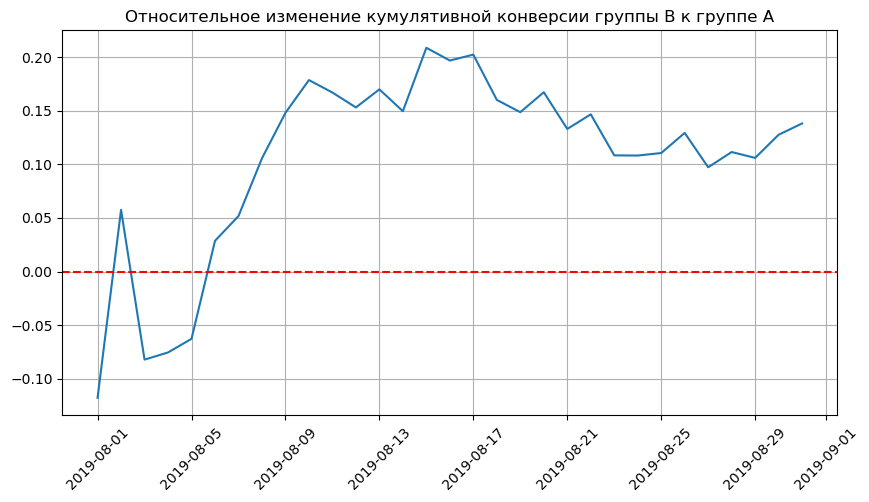

In [87]:
conversion_A = data_cumsum[data_cumsum['group'] == 'A'][['date', 'conversion']]
conversion_B = data_cumsum[data_cumsum['group'] == 'B'][['date', 'conversion']]

conversion_B_to_A = conversion_A.merge(conversion_B,
                                       on = 'date',
                                       suffixes = ['_A', '_B']) \
                                .eval('conversion_B_to_A = (conversion_B / conversion_A) - 1')

plt.figure(figsize = (10,5))

plt.plot(conversion_B_to_A['date'],
         conversion_B_to_A['conversion_B_to_A'])

plt.axhline(y = 0,
            color = 'red',
            linestyle = '--')

plt.grid()
plt.xticks(rotation = 45)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')

В начале августа неопределенная ситуация, позже - конверсия группы B лидирует --> предыдущий график показывает тоже самое

---

<a id = 'stage_2_6'></a>

##### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения

[к оглавлению](#title)

Text(0.5, 1.0, 'Точечный график кол-ва заказов по пользователям')

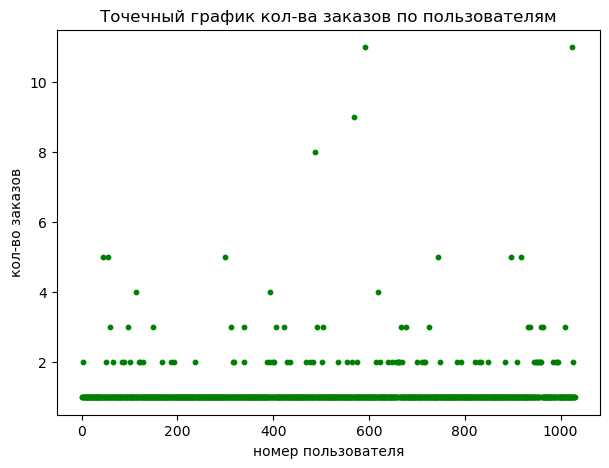

In [88]:
orders_6 = orders.groupby('visitorId').agg({'transactionId': 'nunique'}).reset_index()

plt.figure(figsize=(7,5))
plt.scatter(x = orders_6.reset_index()['index'],
            y = orders_6.reset_index()['transactionId'],
            color = 'green',
            s = 10)
plt.xlabel('номер пользователя')
plt.ylabel('кол-во заказов')
plt.title('Точечный график кол-ва заказов по пользователям')

Большинство пользователей покупает один раз, некоторые - 2 раза, все остальные пользователи покупают более 2 раз

---

<a id = 'stage_2_7'></a>

##### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей

[к оглавлению](#title)

In [89]:
orders_7 = orders_6.rename({'transactionId': 'orders_count'}, axis=1)
np.percentile(orders_7['orders_count'], q = [90,95,99,100])

array([ 1.,  2.,  4., 11.])

все пользователи, с четырьмя и выше заказов - аномальные, q = 99 - граница

<a id = 'stage_2_8'></a>

##### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения

[к оглавлению](#title)

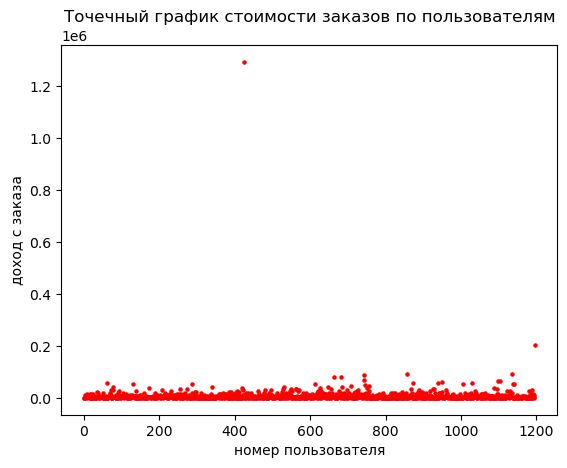

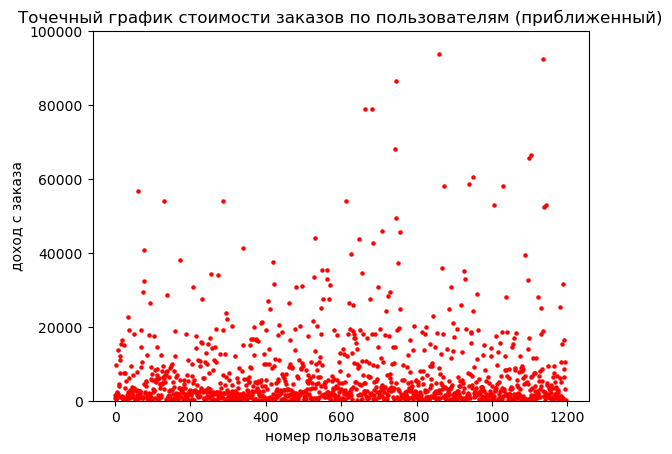

In [90]:
orders_8 = orders['revenue'].reset_index().rename({'index': '№'}, axis=1)

plt.scatter(x = orders_8['№'],
            y = orders_8['revenue'],
            s = 5,
            color = 'red')
plt.xlabel('номер пользователя')
plt.ylabel('доход с заказа')
plt.title('Точечный график стоимости заказов по пользователям')
plt.show()


plt.scatter(x = orders_8['№'],
            y = orders_8['revenue'],
            s = 5,
            color = 'red')
plt.xlabel('номер пользователя')
plt.ylabel('доход с заказа')
plt.title('Точечный график стоимости заказов по пользователям (приближенный)')
plt.ylim((0, 100000))
plt.show()

- большинство заказов стоимостью до 10 000
- есть два сильных выброса (1 график)
- самый сильный выброс и повлиял на график кумулятивной выручки и кумулятивного среднего чека

<a id = 'stage_2_9'></a>

##### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов

[к оглавлению](#title)

In [91]:
orders_9 = orders['revenue']
np.percentile(orders_9, q = [90,95,99,100])

array([  18168. ,   28000. ,   58233.2, 1294500. ])

In [92]:
np.ptp(orders_9, axis = 0)  # размах подтверждает отдаленность данных за 99 перцентилем

1294450

Аномальными назовем данные за 99 перцентилем

---

<a id = 'stage_2_10'></a>

##### 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения

[к оглавлению](#title)

In [93]:
# Найдем конверсию по группам
orders_10 =\
orders.groupby('group').agg({'transactionId': 'count'}).reset_index().rename({'transactionId': 'transaction_count'}, axis=1)

visitors_10 =\
visitors.groupby('group').agg({'visitors': 'sum'}).reset_index()

data_10 = pd.merge(orders_10,
                   visitors_10,
                   on = 'group')
data_10 = data_10.eval('conversion = transaction_count / visitors')
data_10

,group,transaction_count,visitors,conversion
0,A,557,18736,0.029729
1,B,640,18916,0.033834


Пусть:

- H0: Конверсия A равна конверсии B
- H1: Конверсия A НЕ равна конверсии B

In [94]:


alpha = 0.05

buys_A = data_10['transaction_count'][0]
buys_B = data_10['transaction_count'][1]

visitors_A = data_10['visitors'][0]
visitors_B = data_10['visitors'][1]

p1 = buys_A / visitors_A
p2 = buys_B / visitors_B

combo = (buys_A + buys_B) / (visitors_A + visitors_B)

delta =  p1-p2

z_value = delta / np.sqrt(combo * (1-combo) * ((1/visitors_A) + (1/visitors_B)))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print(f'p_значение = {p_value}')
if alpha > p_value:
    print('Отвергаем H0')
else:
    print(f'Не отвергаем H0 при alpha = {alpha}')



p_значение = 0.02320723394441848
Отвергаем H0


Конверсия B больше, значимость ЕСТЬ

---

<a id = 'stage_2_11'></a>

##### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения

[к оглавлению](#title)

In [95]:
mean_check =\
orders.groupby(['group']).agg({'revenue': 'sum', 'transactionId': 'nunique'}).reset_index()
mean_check = mean_check.eval('mean_check = revenue / transactionId').round(2)
mean_check

,group,revenue,transactionId,mean_check
0,A,4084803,557,7333.58
1,B,5907760,640,9230.88


Сформулируем гипотезы

- H0: Средний чек A не больше среднего чека B
- H1: Средний чек A больше среднего чека B

In [96]:
stat, p = st.normaltest(orders['revenue'])
print('Statistics = %.3f, p-value = %.3f'%(stat, p))

alpha = 0.05

if p > alpha:
    print('Принять гипотезу о нормальности распределения')
else:
    print('Отклонить гипотезу о нормальности')

Statistics = 3183.987, p-value = 0.000
Отклонить гипотезу о нормальности


Выбираем критерий Мана-Уитни

In [97]:
alpha = 0.05

revenue_dirty_A = orders[orders['group'] == 'A']['revenue']
revenue_dirty_B = orders[orders['group'] == 'B']['revenue']

test = st.mannwhitneyu(revenue_dirty_A,
                       revenue_dirty_B)

print(f'p-значение: {test.pvalue}')
if alpha > test.pvalue:
    print('отвергаем H0')
else:
    print('При выбранном alpha - H0 не отвергаем')

print('\n')
print(f'Средний чек по группе A: {revenue_dirty_A.mean().round(2)}')
print(f'Средний чек по группе B: {revenue_dirty_B.mean().round(2)}')

p-значение: 0.7292909855432458
При выбранном alpha - H0 не отвергаем


Средний чек по группе A: 7333.58
Средний чек по группе B: 9230.88


Большая вероятность p-значения говорит о жизнеспособности нулевой гипотезы --> вывод о различии делать нельзя

---

<a id = 'stage_2_12'></a>

##### 12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения

[к оглавлению](#title)

В 7-м пункте мы решили, что все пользователи с четырьмя и выше кол-вом заказов - являются аномальными

In [98]:
# Найдем индексы чистых данных
orders_count_clear =\
orders.groupby('visitorId').agg({'transactionId': 'count'}) \
                           .reset_index() \
                           .query('transactionId <= 4') \
                           .set_index('visitorId') \
                           .rename({'transactionId': 'transactions_count'}, axis = 1)
orders_count_clear.head()

,transactions_count
visitorId,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1


In [99]:
orders_clear =\
orders.set_index('visitorId').loc[orders_count_clear.index].reset_index()

orders_clear.head()

,visitorId,transactionId,date,revenue,group
0,5114589,900025958,2019-08-16,570,B
1,6958315,1887336629,2019-08-04,1490,B
2,8300375,3679129301,2019-08-01,10510,B
3,8300375,4293855558,2019-08-07,1790,A
4,11685486,797272237,2019-08-23,6201,A


In [100]:
orders_clear_transactions_per_group =\
orders.groupby('group').agg({'transactionId': 'count'}) \
                       .reset_index() \
                       .rename({'transactionId': 'transactions_count'}, axis = 1)

orders_clear_transactions_per_group

,group,transactions_count
0,A,557
1,B,640


In [101]:
visitors_count_per_group =\
visitors.groupby('group').agg({'visitors': 'sum'}).reset_index()

visitors_count_per_group

,group,visitors
0,A,18736
1,B,18916


In [102]:
conversion_clear =\
pd.merge(orders_clear_transactions_per_group,
         visitors_count_per_group,
         on = 'group')

conversion_clear

,group,transactions_count,visitors
0,A,557,18736
1,B,640,18916


Воспользуемся Z-критерием для разности двух долей

Сформулируем гнипотезы:

- H0: конверсия в A РАВНА конверсии в B
- H1: конверсия в A НЕ РАВНА конверсии в B

In [103]:
alpha=0.05

purchases = np.array(conversion_clear['transactions_count'])
leads = np.array(conversion_clear['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / np.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2


print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу


In [104]:
conversion_clear = conversion_clear.eval('conversion = transactions_count / visitors')
conversion_clear

,group,transactions_count,visitors,conversion
0,A,557,18736,0.029729
1,B,640,18916,0.033834


Конверсия в группах A и B не равны, конверсия B больше ( этот же результат был показан в тесте на сырых данных)

---

<a id = 'stage_2_13'></a>

##### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения

[к оглавлению](#title)

На 8-м пункте мы выяснили, что есть большой выброс и один поменьше --> удалим оба (ориентируемся на scatter график 8 пункта (оба больше 200 000))

In [105]:
######  Очистка данных по доходу ######## 
# В 9-м пункте мы выяснили --> все данные по стоимости заказов выше 99 перцентиля - аномальные, применим это при очистке
revenue_99_percentile = np.percentile(orders['revenue'], q = 99)
orders_clear_13 = orders.query('revenue <= @revenue_99_percentile')

revenue_clear_A = orders_clear_13[orders_clear_13['group'] == 'A']['revenue']
revenue_clear_B = orders_clear_13[orders_clear_13['group'] == 'B']['revenue']


######## Проверка на нормальность выборки #############
stat, p = st.normaltest(orders_clear_13['revenue'])
print('Statistics = %.3f, p-value = %.3f'%(stat, p))

alpha = 0.05

if p > alpha:
    print('Принять гипотезу о нормальности распределения')
else:
    print('Отклонить гипотезу о нормальности')

Statistics = 683.440, p-value = 0.000
Отклонить гипотезу о нормальности


Используем критерий Манна-Уитни

Сформулируем гипотезы:

- H0: Средний чек по группе A НЕ превосходит средний чек группы B
- H1: Средний чек по группе A превосходит средний чек группы B

In [106]:
alpha = 0.05

test = st.mannwhitneyu(revenue_clear_A,
                       revenue_clear_B)

print(f'p-значение: {test.pvalue}')
if alpha > test.pvalue:
    print('отвергаем H0')
else:
    print('При выбранном alpha - H0 не отвергаем')

print('\n')
print(f'Средний чек по группе A "ОЧИЩЕННЫЙ": {revenue_clear_A.mean().round(2)}')
print(f'Средний чек по группе B "ОЧИЩЕННЫЙ": {revenue_clear_B.mean().round(2)}')

print('\n')
print(f'Средний чек по группе A "ГРЯЗНЫЙ": {revenue_dirty_A.mean().round(2)}')
print(f'Средний чек по группе B "ГРЯЗНЫЙ": {revenue_dirty_B.mean().round(2)}')

p-значение: 0.6208626966847455
При выбранном alpha - H0 не отвергаем


Средний чек по группе A "ОЧИЩЕННЫЙ": 6470.59
Средний чек по группе B "ОЧИЩЕННЫЙ": 6592.69


Средний чек по группе A "ГРЯЗНЫЙ": 7333.58
Средний чек по группе B "ГРЯЗНЫЙ": 9230.88


Средний чек заметно изменился, но результат по отклонению нулевой гипотезы не изменился

---

<a id = 'stage_2_14'></a>

##### 14. Примите решение по результатам теста и объясните его

[к оглавлению](#title)

Выборка не большая - 1197, собираем больше данных и анализируем еще раз, B - вырывается и в очищенных и в грязных данных, нужно просто подтверждение на больших данных
ИТОГО --> ТЕСТ ПРОДОЛЖАЕМ